In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [48,48]
trainMyImagesFolder = "E:/Data mimin/UNTAR/SMSTR 7/skripsi/Program Code/testing/testing_kelas_ALLINCLASS/datasets_test_val_final_ALLINCLASS14_added_v12/train"
testMyImagesFolder = "E:/Data mimin/UNTAR/SMSTR 7/skripsi/Program Code/testing/testing_kelas_ALLINCLASS/datasets_test_val_final_ALLINCLASS14_added_v12/validation"

In [3]:
myResNet = ResNet50(input_shape=IMAGE_SIZE + [3] , weights="imagenet", include_top=False)
print(myResNet.summary())

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 54, 54, 3) │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 24, 24,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 24, 24,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 24, 24,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 26, 26,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 12, 12,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 12, 12,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 12, 12,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 12, 12,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 12, 12,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 12, 12,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 12, 12,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 12, 12,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 12, 12,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 12, 12,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 12, 12,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

None


In [4]:
#freeze the weights
for layer in myResNet.layers:
    layer.trainable = False

classes = glob("E:/Data mimin/UNTAR/SMSTR 7/skripsi/Program Code/testing/testing_kelas_ALLINCLASS/datasets_test_val_final_ALLINCLASS14_added_v12/train/*")
print(classes)
numOfClasses = len(classes)

['E:/Data mimin/UNTAR/SMSTR 7/skripsi/Program Code/testing/testing_kelas_ALLINCLASS/datasets_test_val_final_ALLINCLASS14_added_v12/train\\Darryl', 'E:/Data mimin/UNTAR/SMSTR 7/skripsi/Program Code/testing/testing_kelas_ALLINCLASS/datasets_test_val_final_ALLINCLASS14_added_v12/train\\Dion', 'E:/Data mimin/UNTAR/SMSTR 7/skripsi/Program Code/testing/testing_kelas_ALLINCLASS/datasets_test_val_final_ALLINCLASS14_added_v12/train\\Dony', 'E:/Data mimin/UNTAR/SMSTR 7/skripsi/Program Code/testing/testing_kelas_ALLINCLASS/datasets_test_val_final_ALLINCLASS14_added_v12/train\\Edgar', 'E:/Data mimin/UNTAR/SMSTR 7/skripsi/Program Code/testing/testing_kelas_ALLINCLASS/datasets_test_val_final_ALLINCLASS14_added_v12/train\\Hansen', 'E:/Data mimin/UNTAR/SMSTR 7/skripsi/Program Code/testing/testing_kelas_ALLINCLASS/datasets_test_val_final_ALLINCLASS14_added_v12/train\\Joseph', 'E:/Data mimin/UNTAR/SMSTR 7/skripsi/Program Code/testing/testing_kelas_ALLINCLASS/datasets_test_val_final_ALLINCLASS14_added_v1

In [5]:
#build the model
global_avg_pooling_layer = tf.keras.layers.GlobalAveragePooling2D()(myResNet.output)

PlusFlattenLayer = Flatten()(global_avg_pooling_layer)

#add last layer
predictionLayer = Dense(numOfClasses, activation='softmax')(PlusFlattenLayer)

model = Model(inputs=myResNet.input , outputs=predictionLayer)
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 54, 54, 3) │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 24, 24,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 24, 24,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 24, 24,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 26, 26,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 12, 12,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 12, 12,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 12, 12,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 12, 12,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 12, 12,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 12, 12,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 12, 12,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 12, 12,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 12, 12,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 12, 12,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 12, 12,    │      1,024 │ conv2_block1_3_c

 Total params: 23,616,398 (90.09 MB)

 Trainable params: 28,686 (112.05 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

None


In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
#Augmentation Data
train_datagen = ImageDataGenerator(rescale=1./255,
                                #    shear_range = 0.2,
                                #    zoom_range = 0.2,
                                #    horizontal_flip = True
                                   )
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(trainMyImagesFolder,
                                                 target_size=(48, 48),
                                                 batch_size=32,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory(testMyImagesFolder,
                                            target_size=(48, 48),
                                            batch_size=32,
                                            class_mode='categorical')

Found 4434 images belonging to 14 classes.
Found 320 images belonging to 14 classes.


In [8]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

EPOCHS = 150
best_model_file = "E:/Data mimin/UNTAR/SMSTR 7/skripsi/Program Code/testing/testing_kelas_ALLINCLASS/saved_model/resnet-model-v12-150epcV2-loss(csAll)-48x48.keras"

# Define the callbacks
callbacks = [
    ModelCheckpoint(best_model_file, verbose=1, save_best_only=True, monitor='loss'),
    # ReduceLROnPlateau(monitor='val_accuracy', patience=3, factor=0.1, verbose=1, min_lr=1e-6),
    EarlyStopping(monitor='loss', patience=80, verbose=1)
]

steps_per_epoch = training_set.samples # training_set.batch_size
validation_steps = test_set.samples # test_set.batch_size

In [9]:
#train
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=EPOCHS,
    steps_per_epoch=steps_per_epoch,  # Fixed steps per epoch
    validation_steps=validation_steps,  # Fixed validation steps
    callbacks=callbacks
)

Epoch 1/150


C:\Users\Devors\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 139/4434 ━━━━━━━━━━━━━━━━━━━━ 4:02 56ms/step - accuracy: 0.2247 - loss: 2.8251

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 1: loss improved from inf to 2.23463, saving model to E:/Data mimin/UNTAR/SMSTR 7/skripsi/Program Code/testing/testing_kelas_ALLINCLASS/saved_model/resnet-model-v12-150epcV2-loss(csAll)-48x48.keras
4434/4434 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.3378 - loss: 2.2531 - val_accuracy: 0.5781 - val_loss: 1.4541
Epoch 2/150
 138/4434 ━━━━━━━━━━━━━━━━━━━━ 3:57 55ms/step - accuracy: 0.5885 - loss: 1.3869
Epoch 2: loss improved from 2.23463 to 1.26205, saving model to E:/Data mimin/UNTAR/SMSTR 7/skripsi/Program Code/testing/testing_kelas_ALLINCLASS/saved_model/resnet-model-v12-150epcV2-loss(csAll)-48x48.keras
4434/4434 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6245 - loss: 1.2659 - val_accuracy: 0.7250 - val_loss: 1.0571
Epoch 3/150
 138/4434 ━━━━━━━━━━━━━━━━━━━━ 3:54 54ms/step - accuracy: 0.7074 - loss: 1.0012
Epoch 3: loss improved from 1.26205 to 0.94391, saving model to E:/Data mimin/UNTAR/SMSTR 7/skripsi/Program Code/testing/testing_kelas_ALLINCLASS/saved_model/resnet

In [10]:
#print best validation accuracy
best_val_acc = max(r.history['val_accuracy'])
print(f"Best Validation Accuracy:{best_model_file}")

Best Validation Accuracy:E:/Data mimin/UNTAR/SMSTR 7/skripsi/Program Code/testing/testing_kelas_ALLINCLASS/saved_model/resnet-model-v12-150epcV2-loss(csAll)-48x48.keras


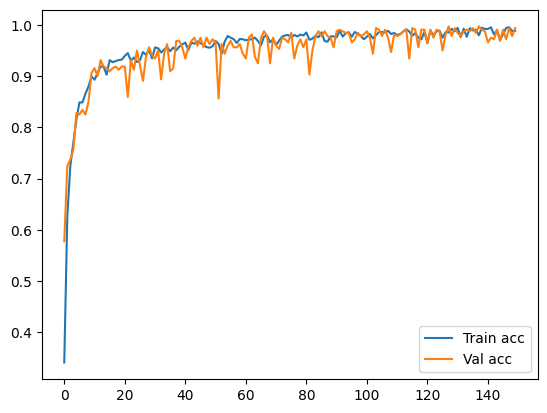

In [11]:
#plot
plt.plot(r.history['accuracy'], label='Train acc')
plt.plot(r.history['val_accuracy'], label='Val acc')
plt.legend()
plt.show()

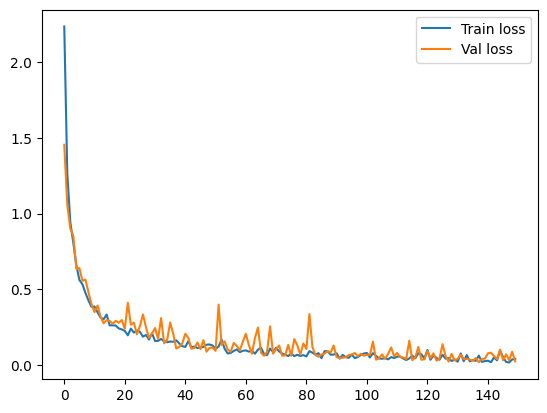

In [12]:
#plot
plt.plot(r.history['loss'], label='Train loss')
plt.plot(r.history['val_loss'], label='Val loss')
plt.legend()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step


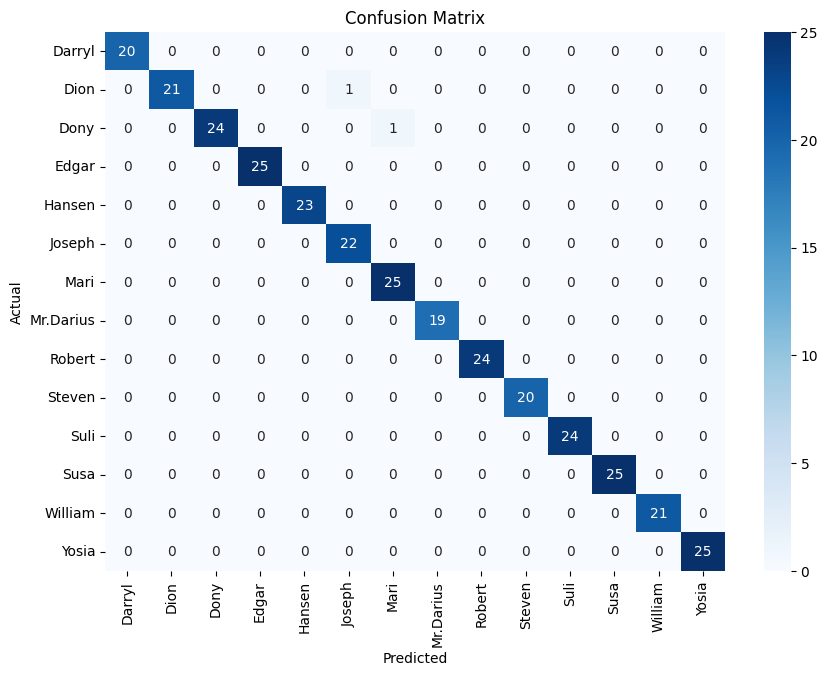

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get validation data (x_val and y_val)
x_val, y_val = [], []
for i in range(len(test_set)):
    x_batch, y_batch = test_set[i]
    x_val.append(x_batch)
    y_val.append(y_batch)
    if (i+1) * 32 >= test_set.samples:  # Adjust to the size of your validation set
        break

# Convert to numpy arrays
x_val = np.vstack(x_val)
y_val = np.vstack(y_val)

# Get predictions
y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=test_set.class_indices, yticklabels=test_set.class_indices)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [14]:
from sklearn.metrics import classification_report

print("Classification report: \n", classification_report(y_true, y_pred_classes))

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.95      0.98        22
           2       1.00      0.96      0.98        25
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        23
           5       0.96      1.00      0.98        22
           6       0.96      1.00      0.98        25
           7       1.00      1.00      1.00        19
           8       1.00      1.00      1.00        24
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00        25
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        25

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320

